In [3]:
import tinysim as ts
import mujoco
import mediapy as media
ts.set_seed(0)


panda_rb = ts.load_robot("panda")
scene = ts.load_scene("desk")

scene.attach(panda_rb)

scene.compile()
model = scene.mj_model
data = mujoco.MjData(model)

mujoco.mj_forward(model, data)

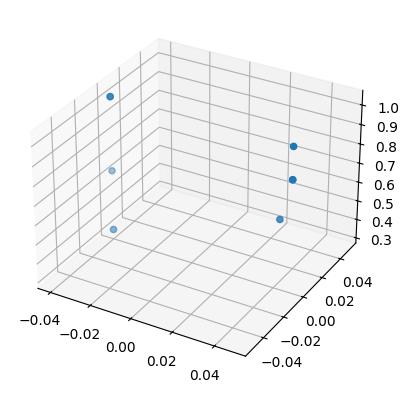

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
fig = plt.figure()
ax = plt.axes(projection='3d')



pos = data.xpos[[obj.id for obj in scene.bodies.values() if obj.movable]]
ax.scatter3D(pos[:, 0], pos[:, 1], pos[:, 2])

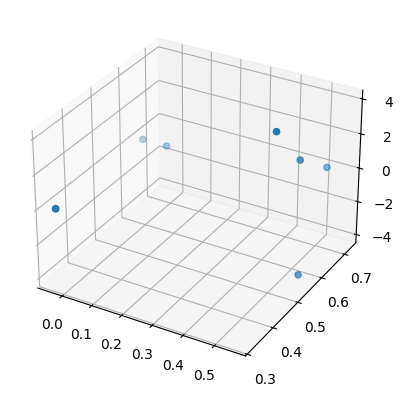

In [10]:
data.qpos[:] = model.key(0).qpos
mujoco.mj_forward(model, data)

fig = plt.figure()
ax = plt.axes(projection='3d')



pos = data.xpos[[obj.id for obj in scene.bodies.values() if obj.movable]]
ax.scatter3D(pos[:, 0], pos[:, 2], pos[:, 1])